In [1]:
pip install dataprep

     |████████████████████████████████| 9.5 MB 5.8 MB/s 
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 46.7 MB/s 
     |████████████████████████████████| 78 kB 8.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 965 kB 44.6 MB/s 
     |████████████████████████████████| 132 kB 46.6 MB/s 
     |████████████████████████████████| 366 kB 57.5 MB/s 
     |████████████████████████████████| 1.0 MB 49.5 MB/s 
     |████████████████████████████████| 1.5 MB 52.9 MB/s 
     |████████████████████████████████| 749 kB 26.6 MB/s 
     |████████████████████████████████| 943 kB 41.6 MB/s 
     |████████████████████████████████| 95 kB 4.4 MB/s 
     |████████████████████████████████| 10.9 MB 46.4 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 271 kB 77.2 MB/s 
     |██████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pandas_profiling import ProfileReport
import plotly
import plotly.graph_objects as go 
import seaborn as sns
%matplotlib inline
import pickle
import os

# Imported Libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [5]:
fyp_data = pd.read_csv("/content/drive/MyDrive/fyp_data.csv")
fyp_data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,week_Tuesday,week_Wednesday,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1,0,78.597568,1,2019-01-01,1.0,5.0,0.0,0.0,4.970000
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1,0,30.212176,1,2019-01-01,1.0,2.0,0.0,0.0,47.737903
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,1,0,108.206083,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,1,0,95.673231,1,2019-01-01,1.0,6.0,0.0,0.0,45.000000
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,1,0,77.556744,1,2019-01-01,1.0,4.0,0.0,0.0,41.960000


In [6]:
fyp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296715 entries, 0 to 1296714
Data columns (total 52 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296715 non-null  int64  
 1   merchant                 1296715 non-null  object 
 2   category                 1296715 non-null  object 
 3   amt                      1296715 non-null  float64
 4   first                    1296715 non-null  object 
 5   last                     1296715 non-null  object 
 6   gender                   1296715 non-null  object 
 7   street                   1296715 non-null  object 
 8   city                     1296715 non-null  object 
 9   state                    1296715 non-null  object 
 10  zip                      1296715 non-null  int64  
 11  lat                      1296715 non-null  float64
 12  long                     1296715 non-null  float64
 13  city_pop                 1296715 non-null 

In [7]:
print(fyp_data['is_fraud'].value_counts())
print('\n')
print(fyp_data['is_fraud'].value_counts(normalize=True))

0    1289209
1       7506
Name: is_fraud, dtype: int64


0    0.994212
1    0.005788
Name: is_fraud, dtype: float64


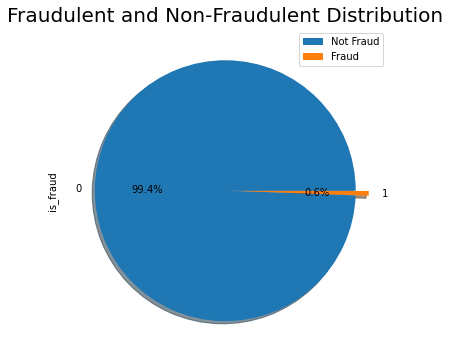

In [8]:
fyp_data["is_fraud"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Not Fraud","Fraud"])
plt.show()

In [9]:
#Finding null values
# Dealing with missing data
fyp_data.isnull().sum().max()

0

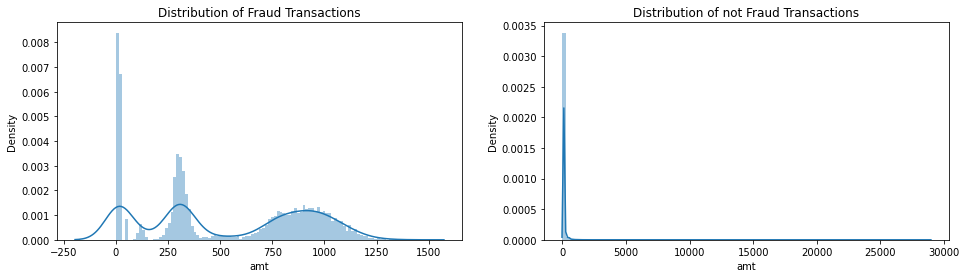

In [10]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(fyp_data[fyp_data['is_fraud'] == 1]['amt'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(fyp_data[fyp_data['is_fraud'] == 0]['amt'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of not Fraud Transactions")

plt.show()


Highlights:
This graph shows that most of the fraud transaction amount is less than 500 dollars. This also shows that the fraud transaction is very high for an amount near to 0, let's find that amount. 

In [11]:
print("Fraud Transaction distribution : \n",fyp_data[(fyp_data['is_fraud'] == 1)]['amt'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",fyp_data[(fyp_data['is_fraud'] == 1)]['amt'].max())
print("Minimum amount of fraud transaction - ",fyp_data[(fyp_data['is_fraud'] == 1)]['amt'].min())

Fraud Transaction distribution : 
 8.75     6
18.55    6
19.36    5
8.78     5
9.94     5
Name: amt, dtype: int64


Maximum amount of fraud transaction -  1376.04
Minimum amount of fraud transaction -  1.06


#### Highlights

There are 6 fraud transactions for 8.75 dollor and 6 fraud transaction for $18.55. And higest fraud transaction amount was 1376.04 and lowest was just 1.06.
There are 6 fraud transaction for 8.75 amount. 18.95 Authorization is an account verification method for credit cards that is used to verify a cardholders information without charging the consumer. Instead, an amount of 8.78 is charged on the card to store the credit card information in the form of a token and to determine whether the card is legitimate or not. After creating the token, is then possible to charge the consumer with a new transaction with either Tokenization or Recurring Payments

In [12]:
print("Genuine Transaction distribution : \n",fyp_data[(fyp_data['is_fraud'] == 0)]['amt'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",fyp_data[(fyp_data['is_fraud'] == 0)]['amt'].max())
print("Minimum amount of Genuine transaction - ",fyp_data[(fyp_data['is_fraud'] == 0)]['amt'].min())

Genuine Transaction distribution : 
 1.14    542
1.04    538
1.25    535
1.02    533
1.01    523
Name: amt, dtype: int64


Maximum amount of Genuine transaction -  28948.9
Minimum amount of Genuine transaction -  1.0


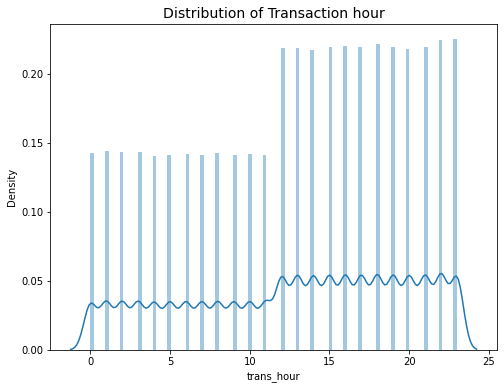

In [13]:
# Time Distribution 
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction hour', fontsize=14)
sns.distplot(fyp_data['trans_hour'], bins=100)
plt.show()

#### Highlights

By seeing the graph, we can see there are two peaks in the graph and even there are some local peaks. We can think of these as the hour of the day like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps. We already know that data contains a credit card transaction for only two days, so there are two peaks for day time and one depth for one night time.

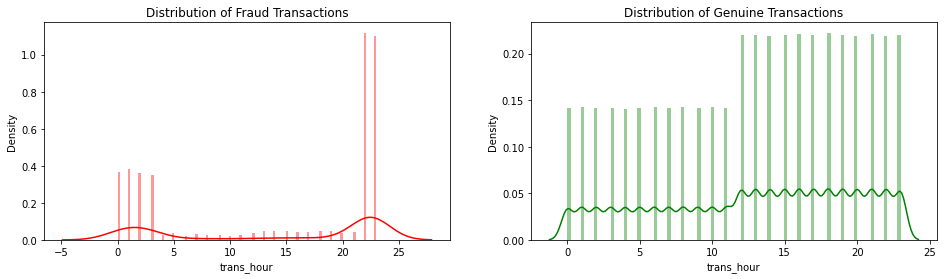

In [14]:
# Distribution of time w.r.t. transactions types
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(fyp_data[(fyp_data['is_fraud'] == 1)]['trans_hour'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(fyp_data[(fyp_data['is_fraud'] == 0)]['trans_hour'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

#### Correlation Among Explanatory Variables
Having too many features in a model is not always a good thing because it might cause overfitting and worse results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

Another important thing is correlation. If there is a very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. However, this does not mean that you must remove one of the highly correlated features.

Let's find out top 10 features which are highly correlated with a price.

In [15]:
fyp_data[['trans_hour','amt','is_fraud']].corr()['is_fraud'].sort_values(ascending=False).head(10)

is_fraud      1.000000
amt           0.219404
trans_hour    0.013799
Name: is_fraud, dtype: float64

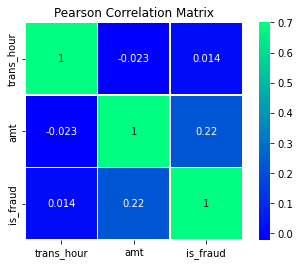

In [16]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(fyp_data[['trans_hour', 'amt','is_fraud']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="winter",
            linecolor='w',annot=True);

#### Highlights

It looks like that no features are highly correlated with any other features.

In [17]:
#Lets check the data again after cleaning
fyp_data.shape

(1296715, 52)

In [18]:
fyp_data['is_fraud'].value_counts(normalize=True)

0    0.994212
1    0.005788
Name: is_fraud, dtype: float64

# Feature Engineering

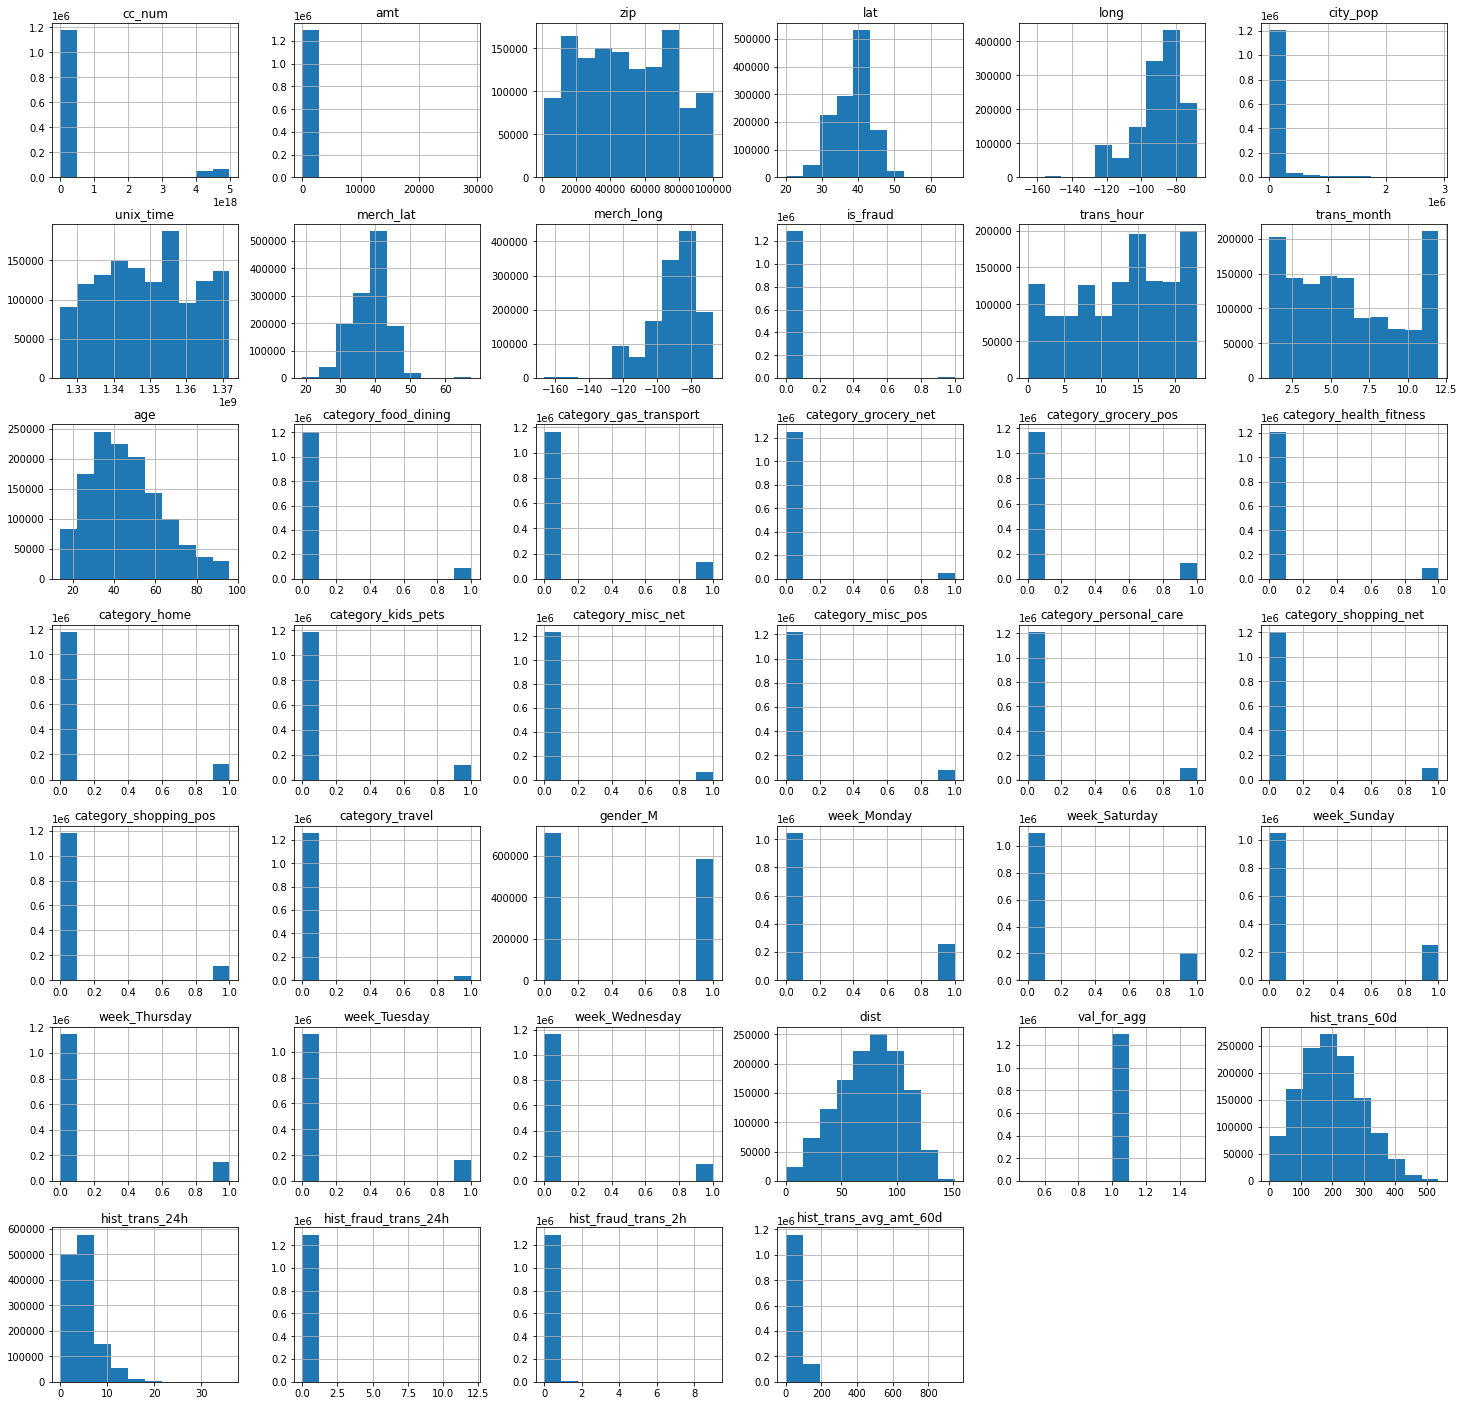

In [19]:
fyp_data.hist(figsize = (25,25))
plt.show()

In [20]:
# Reset the index
fyp_data.reset_index(inplace = True , drop = True)

#### Scale Amount Feature
It is a good idea to scale the data so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like a salary has ranged from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm
This will result in a better prediction model.
PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) except for time and amount.

Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled.

#### 1. Scale amount by Log
Scaling using the log: There are two main reasons to use logarithmic scales in charts and graphs.

The first is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data.
The second is to show per cent change or multiplicative factors. 


In [21]:
# Scale amount by log
fyp_data['amount_log'] = np.log(fyp_data.amt + 0.01)

#### 2. Scale amount by Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.


In [22]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
fyp_data['amount_scaled'] = ss.fit_transform(fyp_data['amt'].values.reshape(-1,1))

#### 3. Scale amount by Normalization
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.



In [23]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
fyp_data['amount_minmax'] = mm.fit_transform(fyp_data['amt'].values.reshape(-1,1))

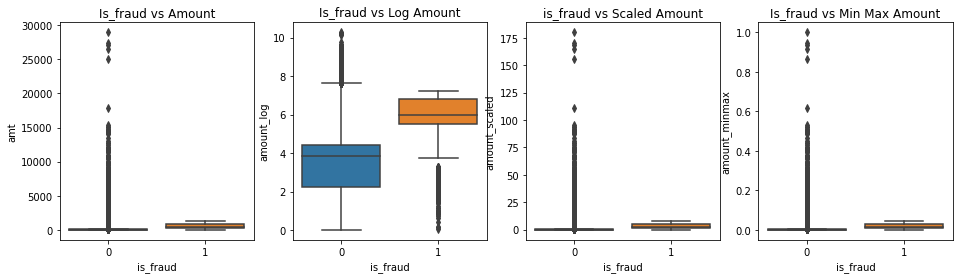

In [24]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="is_fraud",y="amt",data=fyp_data, ax = axs[0])
axs[0].set_title("Is_fraud vs Amount")

sns.boxplot(x ="is_fraud",y="amount_log",data=fyp_data, ax = axs[1])
axs[1].set_title("Is_fraud vs Log Amount")

sns.boxplot(x ="is_fraud",y="amount_scaled",data=fyp_data, ax = axs[2])
axs[2].set_title("is_fraud vs Scaled Amount")

sns.boxplot(x ="is_fraud",y="amount_minmax",data=fyp_data, ax = axs[3])
axs[3].set_title("Is_fraud vs Min Max Amount")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()


#### Hightlights

We can see a slight difference in the log amount of our two Classes.
The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have the highest values.
By seeing the above three graphs, I think scaling the amount by log will best suit for our model.

### Saving preprossed data as serialized files
To deploy the predictive models built we save them along with the required data files as serialized file objects
We save cleaned and processed input data, tuned predictive models as files so that they can later be re-used/shared


In [25]:
CreditCardFraudDataCleaned = fyp_data

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Data set after all the transformations as a file
with open('CreditCardFraudDataCleaned.pkl', 'wb') as fileWriteStream:
    pickle.dump(CreditCardFraudDataCleaned, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file is saved at Location:',os.getcwd())

pickle file is saved at Location: /content


In [26]:
# Reading a Pickle file
with open('CreditCardFraudDataCleaned.pkl', 'rb') as fileReadStream:
    CreditCardFraudDataFromPickle = pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()
    
# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
fyp = CreditCardFraudDataFromPickle
fyp.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d,amount_log,amount_scaled,amount_minmax
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1,2019-01-01,1.0,5.0,0.0,0.0,4.970000,1.605430,-0.407827,0.000137
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1,2019-01-01,1.0,2.0,0.0,0.0,47.737903,4.675069,0.230048,0.003670
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000,5.394173,0.934167,0.007569
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,1,2019-01-01,1.0,6.0,0.0,0.0,45.000000,3.806885,-0.158129,0.001520
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,1,2019-01-01,1.0,4.0,0.0,0.0,41.960000,3.736955,-0.177091,0.001415


In [27]:
fyp.shape

(1296715, 55)

## Splitting data into Training and Testing samples
We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [28]:
for i in fyp.columns:
    try:
        fyp[[i]] = fyp[[i]].astype(int).astype(float)
    except:
        pass

print(fyp.dtypes)



cc_num                     float64
merchant                    object
category                    object
amt                        float64
first                       object
last                        object
gender                      object
street                      object
city                        object
state                       object
zip                        float64
lat                        float64
long                       float64
city_pop                   float64
job                         object
trans_num                   object
unix_time                  float64
merch_lat                  float64
merch_long                 float64
is_fraud                   float64
trans_hour                 float64
day_of_week                 object
trans_month                float64
age                        float64
category_food_dining       float64
category_gas_transport     float64
category_grocery_net       float64
category_grocery_pos       float64
category_health_fitn

In [29]:
X_cols = ['city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d', 'amount_log','amount_scaled','amount_minmax']

Y_cols = ['is_fraud']



In [30]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the log amount and dropping the amount and scaled amount columns.
X = fyp[X_cols]  #Feature Matrix
y = fyp[Y_cols] 

In [31]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [32]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (907700, 31)
y_train -  (907700, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


# Baseline for models
We will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions.

Let's Discuss Next Steps -

## 1 Classification Models

Logistic Regression

Decision Trees

Random Forest

Naive Bayes Classifier

## 2 Class Imbalance Solutions

Under Sampling

Over Sampling

SMOTE

ADASYN

## 3 Metrics

Accuracy Score

Confusion Matrix

Precision Score

Recall Score

ROC_AUC

F1 Score

Model Building

We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.

### 1. Logistic Regression

#### 1.1 Logistic Regression with imbalanced data

In [ ]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0) 

logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

In [ ]:
# Predict from Test set
y_pred = logreg.predict(X_test)

In [ ]:
# Model Evolution
from sklearn import metrics
# https://en.wikipedia.org/wiki/Precision_and_recall
print(metrics.classification_report(y_test, y_pred))

In [ ]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

#### Confusion Matrix
Every problem is different and derives a different set of values for a particular business use case , thus every model must be evaluated differently.

Let's get to know the terminology and Structure first

A confusion matrix is defined into four parts : { TRUE , FALSE } (Actual) ,{POSITIVE , NEGATIVE} (Predicted) Positive and Negative is what you predict , True and False is what you are told

Which brings us to 4 relations : True Positive , True Negative , False Positive , False Negative
P redicted - R ows and A ctual as C olumns



#### Accuracy , Precision and Recall
##### Accuracy : The most used and classic classification metric : Suited for binary classification problems.
 
Basically Rightly predicted results amongst all the results , used when the classes are balanced

##### Precision : What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly, sure about it !
 
##### Sensitivity or Recall : What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible
 
##### F1 Score : Harmonic mean of Precision and Recall. It basically maintains a balance between the precision and recall for your classifier
 


Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.

In reference of our case:

Recall (True Positive Rate): % of all fraudulent transactions cases captured.

Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?

Accuracy: How correct the model is (misleading for fraud/imbalanced data)

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

In [ ]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

In [ ]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on test")

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

## Receiver Operating Characteristics (ROC)
The ROC is a performance measurement for classification problems at various thresholds. It is essentially a probability curve, and the higher the Area Under the Curve (AUC) score the better the model is at predicting fraudulent/non-fraudulent transactions.

It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class.

## ROC CURVE
It is a plot between Sesitivity and ( 1 - Specificity ) , which intuitively is a plot between True Positive Rate and False Positive Rate. It depicts if a model can clearly identify each class or not

Higher the area under the curve , better the model and it's ability to seperate the positive and negative class.

Note : AUC is not a good metric for imbalanced datasets

In [ ]:
metrics.roc_auc_score(y_test , y_pred) 

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

In [ ]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Class Imbalance
Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. If one applies classifiers on the dataset, they are likely to predict everything as the majority class. This was often regarded as a problem in learning from highly imbalanced datasets

##### Let's Fix the class Imbalance and apply some sampling techniques.

Ref : https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

## Under Sampling and Over Sampling
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set.

## Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.

## Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.



## Synthetic Minority OverSampling Technique (SMOTE)
In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.



## Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN)
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

Ref : https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa

### Import imbalace technique algorithms

In [45]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

### 1.2.Logistic Regression with Random Undersampling technique

In [46]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [47]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (907700, 31)
y_train -  (907700, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


In [48]:
# Undersampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

rus = RandomUnderSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({'is_fraud': 1})
Resampled dataset shape Counter({'is_fraud': 1})
X_train -  (10476, 31)
y_train -  (10476, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


In [49]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [50]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  305211
FP:  81536
FN:  545
TP:  1723
recall =  0.76 precision =  0.021
F1 =  0.04


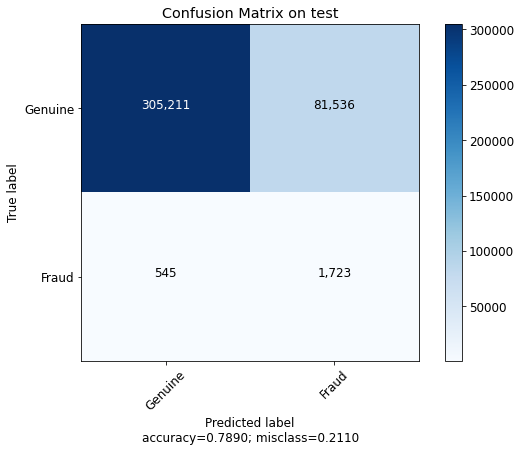

In [51]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on test")

In [52]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.78900
AUC : 0.77444
Precision : 0.02069
Recall : 0.75970
F1 : 0.04029


f1=0.040


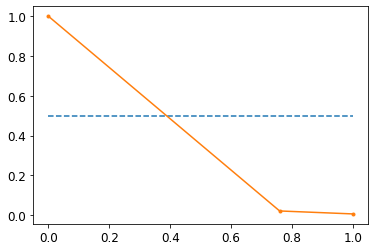

In [53]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

### 1.3.Logistic Regression with Random Oversampling technique

In [54]:
from imblearn.over_sampling import RandomOverSampler

Modified the original nb so the test is separated BEFORE any oversampling - to prevent data leakage
Identical samples in the train AND test = data leakage....

Oversampling is performed ONLY on train


In [55]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (907700, 31)
y_train -  (907700, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


In [56]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({'is_fraud': 1})
Resampled dataset shape Counter({'is_fraud': 1})
X_train -  (1804924, 31)
y_train -  (1804924, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


In [57]:
# Oversampling with Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [58]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.84293
AUC : 0.81383
Precision : 0.02851
Recall : 0.78439
F1 : 0.05503


In [59]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  326133
FP:  60614
FN:  489
TP:  1779
recall =  0.784 precision =  0.029
F1 =  0.055


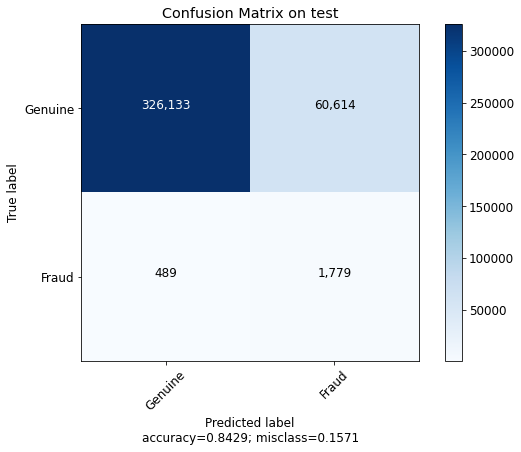

In [60]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on test")

### 1.4 Logistic Regression with SMOTE data

In [61]:
from imblearn.over_sampling import SMOTE, ADASYN

In [62]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)


X_train -  (907700, 31)
y_train -  (907700, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


In [63]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({'is_fraud': 1})
Resampled dataset shape Counter({'is_fraud': 1})
X_train -  (1804924, 31)
y_train -  (1804924, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


In [64]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [65]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.79404
AUC : 0.76711
Precision : 0.02066
Recall : 0.73986
F1 : 0.04020


In [66]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  307217
FP:  79530
FN:  590
TP:  1678
recall =  0.74 precision =  0.021
F1 =  0.04


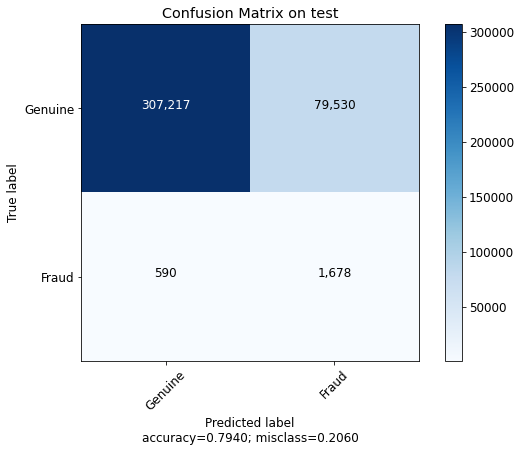

In [67]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on test")

### 1.5 Logistic Regression with ADASYN data

In [68]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (907700, 31)
y_train -  (907700, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


In [69]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({'is_fraud': 1})
Resampled dataset shape Counter({'is_fraud': 1})
X_train -  (1806357, 31)
y_train -  (1806357, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


In [70]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [71]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.59320
AUC : 0.64396
Precision : 0.00991
Recall : 0.69533
F1 : 0.01954


In [72]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  229186
FP:  157561
FN:  691
TP:  1577
recall =  0.695 precision =  0.01
F1 =  0.02


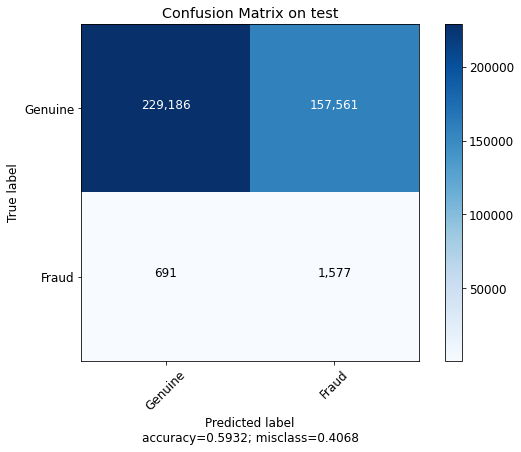

In [73]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Genuine', 'Fraud'],
                      title        = "Confusion Matrix on test")

Spatial nature of class imbalance
we will reduce 31 columns to 2 columns with the help of Principal Component Analysis so that I can look at them in a plot! (because to plot graph we need two dimensions)

In [74]:
from sklearn.decomposition import PCA

### Distribution of balaced dataset
Finally, we can create a scatter plot of the dataset and colour the examples for each class a different colour to clearly see the spatial nature of the class imbalance.

A scatter plot of the dataset is created showing the large mass of points that belong to the minority class (red) and a small number of points spread out for the minority class (blue). We can see some measure of overlap between the two classes.



In [75]:
X_reduced_pca_im = PCA(n_components=2, random_state=42).fit_transform(X)

# Building different models with different balanced datasets
Let's now try different models , first by creating multiple datasets for undersampled , oversampled and SMOTE sampled

## 1. Undersampled Data

In [77]:
# Split BEFORE any under / oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
#print('Original dataset shape %s' % Counter(y_train))
random_state = 42

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

X_train = X_res
y_train = y_res

# Slit into train and test datasets
X_train_under, X_test_under, y_train_under, y_test_under = X_train, X_test, y_train, y_test

print("X_train_under - ",X_train_under.shape)
print("y_train_under - ",y_train_under.shape)
print("X_test_under - ",X_test_under.shape)
print("y_test_under - ",y_test_under.shape)

X_train -  (907700, 31)
y_train -  (907700, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)
--------------------------------------------------
X_train_under -  (10476, 31)
y_train_under -  (10476, 1)
X_test_under -  (389015, 31)
y_test_under -  (389015, 1)


## 2. Oversampled Data

In [78]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_over, X_test_over, y_train_over, y_test_over = X_train, X_test, y_train, y_test

print("X_train_over - ",X_train_over.shape)
print("y_train_over - ",y_train_over.shape)
print("X_test_over - ",X_test_over.shape)
print("y_test_over - ",y_test_over.shape)

X_train -  (907700, 31)
y_train -  (907700, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)
--------------------------------------------------
Original dataset shape Counter({'is_fraud': 1})
Resampled dataset shape Counter({'is_fraud': 1})
X_train_over -  (1804924, 31)
y_train_over -  (1804924, 1)
X_test_over -  (389015, 31)
y_test_over -  (389015, 1)


## 3. SMOTE Data

In [79]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

smote = SMOTE(random_state=42)
X_res, y_res  = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_smote, X_test_smote, y_train_smote, y_test_smote = X_train, X_test, y_train, y_test

print("X_train_smote - ",X_train_smote.shape)
print("y_train_smote - ",y_train_smote.shape)
print("X_test_smote - ",X_test_smote.shape)
print("y_test_smote - ",y_test_smote.shape)

X_train -  (907700, 31)
y_train -  (907700, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)
--------------------------------------------------
Original dataset shape Counter({'is_fraud': 1})
Resampled dataset shape Counter({'is_fraud': 1})
X_train_smote -  (1804924, 31)
y_train_smote -  (1804924, 1)
X_test_smote -  (389015, 31)
y_test_smote -  (389015, 1)


## 4. ADASYN Data

In [80]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = X_train, X_test, y_train, y_test

print("X_train_adasyn - ",X_train_adasyn.shape)
print("y_train_adasyn - ",y_train_adasyn.shape)
print("X_test_adasyn - ",X_test_adasyn.shape)
print("y_test_adasyn - ",y_test_adasyn.shape)

X_train -  (907700, 31)
y_train -  (907700, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)
--------------------------------------------------
Original dataset shape Counter({'is_fraud': 1})
Resampled dataset shape Counter({'is_fraud': 1})
X_train_adasyn -  (1806357, 31)
y_train_adasyn -  (1806357, 1)
X_test_adasyn -  (389015, 31)
y_test_adasyn -  (389015, 1)


In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

##### Function to create the datasets for under, oversampling and capture their performance

In [82]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    #plt.figure(figsize=(12,6))

    for name, model, X_train, X_test, y_train, y_test in models:
        
        names_lst.append(name)

        # split data in train test set
        X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test
        
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        #print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        #print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        #print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        #print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        #print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")

# Logistic Regression (LR)

In [83]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

#LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_under, X_test_under, y_train_under, y_test_under))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_over, X_test_over, y_train_over, y_test_over))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_smote, X_test_smote, y_train_smote, y_test_smote))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

Model Name : LR Undersampling
Test Accuracy :0.99161
Test AUC : 0.96290
Test Precision : 0.40474
Test Recall : 0.93386
Test F1 : 0.56472
Confusion Matrix : 
 [[383632   3115]
 [   150   2118]]


Model Name : LR Oversampling
Test Accuracy :0.98763
Test AUC : 0.93745
Test Precision : 0.30623
Test Recall : 0.88668
Test F1 : 0.45523
Confusion Matrix : 
 [[382191   4556]
 [   257   2011]]


Model Name : LR SMOTE
Test Accuracy :0.99115
Test AUC : 0.94755
Test Precision : 0.38866
Test Recall : 0.90344
Test F1 : 0.54350
Confusion Matrix : 
 [[383524   3223]
 [   219   2049]]


Model Name : LR ADASYN
Test Accuracy :0.98958
Test AUC : 0.93624
Test Precision : 0.34583
Test Recall : 0.88228
Test F1 : 0.49690
Confusion Matrix : 
 [[382962   3785]
 [   267   2001]]




# Decision Tree (DT)

In [84]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

#DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt, X_train_under, X_test_under, y_train_under, y_test_under))
DTmodels.append(('DT Oversampling', dt,X_train_over, X_test_over, y_train_over, y_test_over))
DTmodels.append(('DT SMOTE', dt,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
DTmodels.append(('DT ADASYN', dt ,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

Model Name : DT Undersampling
Test Accuracy :0.97335
Test AUC : 0.97542
Test Precision : 0.17686
Test Recall : 0.97751
Test F1 : 0.29953
Confusion Matrix : 
 [[376429  10318]
 [    51   2217]]


Model Name : DT Oversampling
Test Accuracy :0.99926
Test AUC : 0.96719
Test Precision : 0.93805
Test Recall : 0.93474
Test F1 : 0.93640
Confusion Matrix : 
 [[386607    140]
 [   148   2120]]


Model Name : DT SMOTE
Test Accuracy :0.99919
Test AUC : 0.96716
Test Precision : 0.92738
Test Recall : 0.93474
Test F1 : 0.93105
Confusion Matrix : 
 [[386581    166]
 [   148   2120]]


Model Name : DT ADASYN
Test Accuracy :0.99912
Test AUC : 0.96668
Test Precision : 0.91609
Test Recall : 0.93386
Test F1 : 0.92489
Confusion Matrix : 
 [[386553    194]
 [   150   2118]]




# Random Forest (RF)

In [85]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

#RFmodels.append(('RF imbalance', RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_under, X_test_under, y_train_under, y_test_under))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_over, X_test_over, y_train_over, y_test_over))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, X_test_smote, y_train_smote, y_test_smote))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

Model Name : RF Undersampling
Test Accuracy :0.99132
Test AUC : 0.98446
Test Precision : 0.40004
Test Recall : 0.97751
Test F1 : 0.56773
Confusion Matrix : 
 [[383422   3325]
 [    51   2217]]


Model Name : RF Oversampling
Test Accuracy :0.99957
Test AUC : 0.96493
Test Precision : 0.99528
Test Recall : 0.92989
Test F1 : 0.96148
Confusion Matrix : 
 [[386737     10]
 [   159   2109]]


Model Name : RF SMOTE
Test Accuracy :0.99948
Test AUC : 0.95678
Test Precision : 0.99663
Test Recall : 0.91358
Test F1 : 0.95330
Confusion Matrix : 
 [[386740      7]
 [   196   2072]]


Model Name : RF ADASYN
Test Accuracy :0.99949
Test AUC : 0.95832
Test Precision : 0.99569
Test Recall : 0.91667
Test F1 : 0.95455
Confusion Matrix : 
 [[386738      9]
 [   189   2079]]




In [86]:
# Display comparison of the models performance

# Display comparison of the models performance

data = {
    'Model':[names_lst],
    'Accuracy_Train':[accuracy_train_lst],
    'Accuracy_Test':[accuracy_test_lst],
    'AUC_Train':[aucs_train_lst],
    'AUC_Test':[aucs_test_lst],
    'PrecisionScore_Train':[precision_train_lst],
    'PrecisionScore_Test':[precision_test_lst],
    'RecallScore_Train':[recall_train_lst],
    'RecallScore_Test':[recall_test_lst],
    'F1Score_Train':[f1_train_lst],
    'F1Score_Test':[f1_test_lst]
}

print("Performance measures of various classifiers: \n")

performance_df = pd.DataFrame.from_dict(data) 
performance_df.sort_values(['F1Score_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Train,Accuracy_Test,AUC_Train,AUC_Test,PrecisionScore_Train,PrecisionScore_Test,RecallScore_Train,RecallScore_Test,F1Score_Train,F1Score_Test
0,"[LR Undersampling, LR Oversampling, LR SMOTE, ...","[0.9595265368461244, 0.9369945770569841, 0.972...","[0.9916070074418725, 0.9876277264372839, 0.991...","[0.9595265368461245, 0.936994577056984, 0.9729...","[0.962904036371316, 0.937451996095739, 0.94755...","[0.992430441898527, 0.9869174525331693, 0.9913...","[0.40473915536021404, 0.3062281102482107, 0.38...","[0.9261168384879725, 0.8857303687025049, 0.954...","[0.9338624338624338, 0.88668430335097, 0.90343...","[0.9581275923365594, 0.933590127517233, 0.9724...","[0.5647247033728836, 0.45523486134691565, 0.54..."


In [87]:
# Neural Network

In [88]:
import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [89]:
# F1 function as there is none in Keras metrics
# https://medium.com/@aakashgoel12/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d

import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [90]:
# NN model

model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(31,)))
#model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(30,)))
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



model.compile(tf.keras.optimizers.Adam(lr=1e-4), 
              loss='binary_crossentropy', 
              metrics=[get_f1])
              #metrics=['binary_accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              65536     
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 67,585
Trainable params: 67,585
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
# Pick one of the four: under, over, smote or adasyn

X_train, y_train, X_test, y_test = X_train_over, y_train_over, X_test_over, y_test_over

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (1804924, 31)
y_train -  (1804924, 1)
X_test -  (389015, 31)
y_test -  (389015, 1)


In [92]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 16

history = model.fit(X_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_split = 0.2)

Epoch 1/10
90247/90247 [==============================] - 278s 3ms/step - loss: 99.1539 - get_f1: 0.8097 - val_loss: 0.5835 - val_get_f1: 0.9819
Epoch 2/10
90247/90247 [==============================] - 279s 3ms/step - loss: 62.2030 - get_f1: 0.8533 - val_loss: 0.2913 - val_get_f1: 0.9862
Epoch 3/10
90247/90247 [==============================] - 278s 3ms/step - loss: 36.0456 - get_f1: 0.8631 - val_loss: 0.3672 - val_get_f1: 0.9754
Epoch 4/10
90247/90247 [==============================] - 280s 3ms/step - loss: 20.3781 - get_f1: 0.8696 - val_loss: 1.5966 - val_get_f1: 0.9782
Epoch 5/10
90247/90247 [==============================] - 271s 3ms/step - loss: 12.1992 - get_f1: 0.8738 - val_loss: 32.2826 - val_get_f1: 0.8964
Epoch 6/10
90247/90247 [==============================] - 277s 3ms/step - loss: 9.2089 - get_f1: 0.8769 - val_loss: 54.3804 - val_get_f1: 0.8007
Epoch 7/10
90247/90247 [==============================] - 277s 3ms/step - loss: 5.8421 - get_f1: 0.8810 - val_loss: 0.0983 - val_

In [93]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Metric (acc or f1)")
print("results ", results)
history_dict = history.history
history_dict.keys()

12157/12157 [==============================] - 24s 2ms/step - loss: 0.0336 - get_f1: 0.1411
____________________________________________________________________________________________________
Test Loss and Metric (acc or f1)
results  [0.03364973142743111, 0.14107853174209595]


dict_keys(['loss', 'get_f1', 'val_loss', 'val_get_f1'])

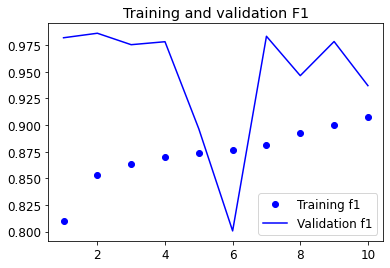

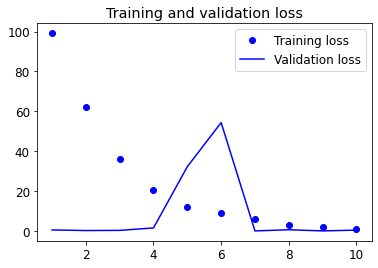

In [94]:
# Learning curves for F1

f1 = history.history['get_f1'] 
val_f1 = history.history['val_get_f1'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(f1) + 1) 
plt.plot(epochs, f1, 'bo', label='Training f1') 
plt.plot(epochs, val_f1, 'b', label='Validation f1') 
plt.title('Training and validation F1') 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 
plt.show()

In [95]:
# VALIDATION ACCURACY curves

In [96]:
# Final Fit / Predict
# NOTE final_predictions is a list of probabilities

final_predictions = model.predict(X_test)
final_predictions.shape

(389015, 1)

In [97]:
# Modify the raw final_predictions - prediction probs into 0 and 1

Preds = final_predictions.copy()
#print(len(Preds))
#print(Preds)
Preds[ np.where( Preds >= 0.5 ) ] = 1
Preds[ np.where( Preds < 0.5 ) ] = 0

In [98]:
# Confusion matrix

from sklearn import metrics
conf_mx = metrics.confusion_matrix(y_test, Preds)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  384620
FP:  2127
FN:  304
TP:  1964
0.8659611992945326 0.48007822048398924


In [99]:
print ('precision ',precision_score(y_test, Preds))
print ('recall ',recall_score(y_test, Preds) )
print ('accuracy ',accuracy_score(y_test, Preds))
print ('F1 score ',f1_score(y_test, Preds))

precision  0.48007822048398924
recall  0.8659611992945326
accuracy  0.9937508836420189
F1 score  0.6177071866645699


Artificial Neural Network

In [100]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [101]:
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.30 , shuffle = True)

In [102]:
def build_classifier(opt):
    model = Sequential()
    model.add(Dense(units = 32,kernel_initializer="uniform",activation="relu"))
    model.add(Dense(units = 64,kernel_initializer="uniform",activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(units = 32,kernel_initializer="uniform",activation="relu"))
    model.add(Dense(units = 1,kernel_initializer="uniform",activation="sigmoid"))
    model.compile(optimizer = opt,loss="binary_crossentropy",metrics=['Recall','acc'])
    return model

In [103]:
## Using Adam optimiser and exerimting with different batch size
opt='adam'
model1 = build_classifier(opt)

history = model1.fit(xtr,ytr,epochs=10,batch_size=256,shuffle=True,verbose=1,validation_split=0.3, callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

#clear_output()

predictions = (model1.predict(xte) > 0.5).astype('int32').reshape(xte.shape[0],)


Epoch 1/10
2482/2482 [==============================] - 13s 5ms/step - loss: 0.0710 - recall: 0.0000e+00 - acc: 0.9940 - val_loss: 0.0437 - val_recall: 0.0000e+00 - val_acc: 0.9942 - lr: 0.0010
Epoch 2/10
2482/2482 [==============================] - 11s 4ms/step - loss: 0.0414 - recall: 0.0208 - acc: 0.9942 - val_loss: 0.0307 - val_recall: 0.0728 - val_acc: 0.9943 - lr: 0.0010
Epoch 3/10
2482/2482 [==============================] - 11s 4ms/step - loss: 0.0286 - recall: 0.1838 - acc: 0.9947 - val_loss: 0.0262 - val_recall: 0.1949 - val_acc: 0.9950 - lr: 0.0010
Epoch 4/10
2482/2482 [==============================] - 11s 5ms/step - loss: 0.0227 - recall: 0.3010 - acc: 0.9953 - val_loss: 0.0197 - val_recall: 0.2177 - val_acc: 0.9954 - lr: 0.0010
Epoch 5/10
2482/2482 [==============================] - 11s 4ms/step - loss: 0.0206 - recall: 0.3882 - acc: 0.9960 - val_loss: 0.0228 - val_recall: 0.2759 - val_acc: 0.9958 - lr: 0.0010
Epoch 6/10
2482/2482 [==============================] - 11s 5m

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    386783
         1.0       1.00      0.40      0.57      2232

    accuracy                           1.00    389015
   macro avg       1.00      0.70      0.79    389015
weighted avg       1.00      1.00      1.00    389015



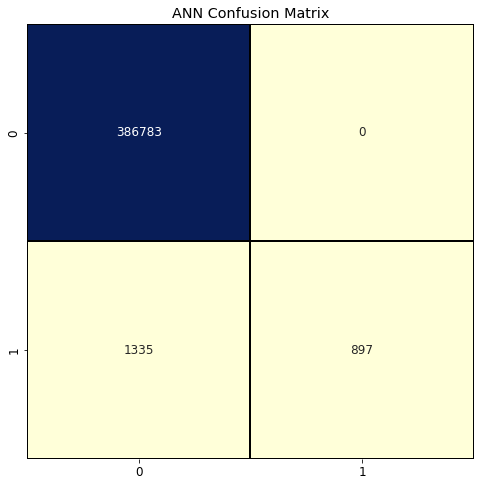

In [104]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(yte, predictions)
print(classification_report(yte, predictions))

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('ANN Confusion Matrix')

plt.show()


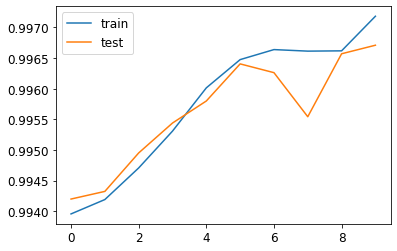

In [105]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [106]:

xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.25 , shuffle = True)

In [107]:
## Using SGD optimiser and exerimting with different batch size
opt = SGD(lr=0.01, momentum=0.9)
model2 = build_classifier(opt)

history = model2.fit(xtr,ytr,epochs=10,batch_size=256,shuffle=True,verbose=1,validation_split=0.2, callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

Epoch 1/10
3040/3040 [==============================] - 14s 4ms/step - loss: 38.2192 - recall: 0.0000e+00 - acc: 0.9938 - val_loss: 0.0383 - val_recall: 0.0000e+00 - val_acc: 0.9944 - lr: 0.0100
Epoch 2/10
3040/3040 [==============================] - 12s 4ms/step - loss: 0.0361 - recall: 0.0000e+00 - acc: 0.9942 - val_loss: 0.0455 - val_recall: 0.0000e+00 - val_acc: 0.9944 - lr: 0.0100
Epoch 3/10
3040/3040 [==============================] - 13s 4ms/step - loss: 0.0361 - recall: 0.0000e+00 - acc: 0.9942 - val_loss: 0.0387 - val_recall: 0.0000e+00 - val_acc: 0.9944 - lr: 0.0100
Epoch 4/10
3040/3040 [==============================] - ETA: 0s - loss: 0.0361 - recall: 0.0000e+00 - acc: 0.9942
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
3040/3040 [==============================] - 12s 4ms/step - loss: 0.0361 - recall: 0.0000e+00 - acc: 0.9942 - val_loss: 0.0421 - val_recall: 0.0000e+00 - val_acc: 0.9944 - lr: 0.0100
Epoch 5/10
3040/3040 [======================

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    322302
         1.0       0.00      0.00      0.00      1877

    accuracy                           0.99    324179
   macro avg       0.50      0.50      0.50    324179
weighted avg       0.99      0.99      0.99    324179



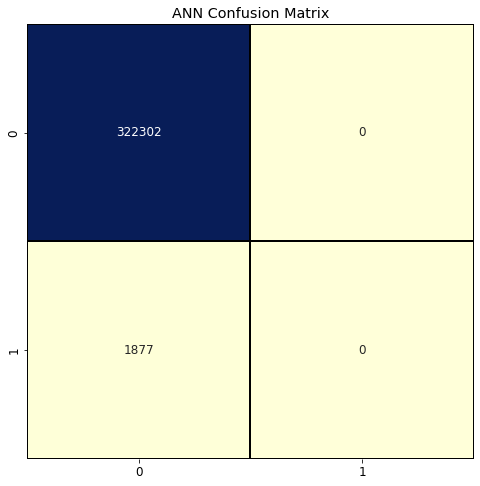

In [108]:
#clear_output()

predictions = (model2.predict(xte) > 0.5).astype('int32').reshape(xte.shape[0],)
conf_matrix = confusion_matrix(yte, predictions)
print(classification_report(yte, predictions))

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('ANN Confusion Matrix')

plt.show()

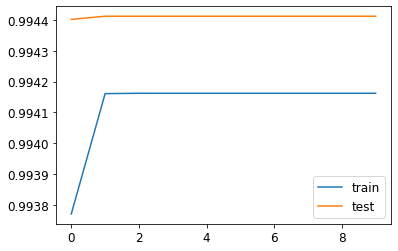

In [109]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [110]:
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.25 , shuffle = True)


Epoch 1/10
1557/1557 [==============================] - 9s 5ms/step - loss: 0.0663 - recall: 2.2512e-04 - acc: 0.9941 - val_loss: 0.0470 - val_recall: 0.0000e+00 - val_acc: 0.9940 - lr: 0.0010
Epoch 2/10
1557/1557 [==============================] - 7s 5ms/step - loss: 0.0451 - recall: 0.0000e+00 - acc: 0.9943 - val_loss: 0.0395 - val_recall: 0.0000e+00 - val_acc: 0.9940 - lr: 0.0010
Epoch 3/10
1557/1557 [==============================] - 7s 5ms/step - loss: 0.0430 - recall: 0.0000e+00 - acc: 0.9943 - val_loss: 0.0729 - val_recall: 0.0000e+00 - val_acc: 0.9940 - lr: 0.0010
Epoch 4/10
1557/1557 [==============================] - 7s 5ms/step - loss: 0.0407 - recall: 0.0000e+00 - acc: 0.9942 - val_loss: 0.0464 - val_recall: 0.0000e+00 - val_acc: 0.9940 - lr: 0.0010
Epoch 5/10
1557/1557 [==============================] - 7s 5ms/step - loss: 0.0378 - recall: 0.0000e+00 - acc: 0.9942 - val_loss: 0.0323 - val_recall: 0.0000e+00 - val_acc: 0.9940 - lr: 0.0010
Epoch 6/10
1557/1557 [=============

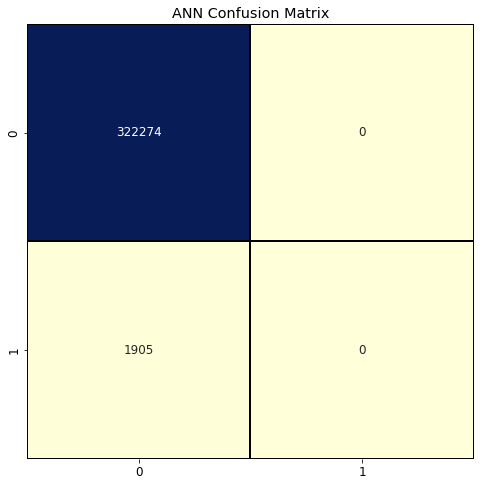

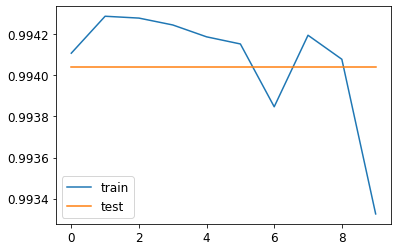

In [111]:
## Using rmsprop optimiser and exerimting with different batch size
opt = 'rmsprop'
model3 = build_classifier(opt)

history = model3.fit(xtr,ytr,epochs=10,batch_size=500,shuffle=True,verbose=1,validation_split=0.2, callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

#clear_output()

predictions = (model3.predict(xte) > 0.5).astype('int32').reshape(xte.shape[0],)
conf_matrix = confusion_matrix(yte, predictions)
print(classification_report(yte, predictions))

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('ANN Confusion Matrix')
plt.show()

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

Creating the BinningProcess instance

Creating a Scorecard

To instantiate the Scorecard class you need to pass as parameters the binning_process and linear model (log_reg),


In [112]:
pip install minfraud

     |████████████████████████████████| 138 kB 12.8 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 269 kB 53.3 MB/s 
     |████████████████████████████████| 330 kB 48.0 MB/s 
  Created wheel for maxminddb: filename=maxminddb-2.2.0-py2.py3-none-any.whl size=16356 sha256=416730508b45b8eb3e04fb503f4be52ad8b507f9e8bc7378ed7d2cab906d2587
  Stored in directory: /root/.cache/pip/wheels/3b/eb/d9/b4407ec5d0ccddce61c8d2f4db72a68a77a04adea2245b98ef
Successfully built maxminddb
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

In [114]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [115]:
from catboost import Pool, CatBoostClassifier, cv

In [121]:
from google.colab import output
output.enable_custom_widget_manager()

In [123]:
model = CatBoostClassifier(learning_rate=0.03)

model.fit(X_train,
       y_train,
       verbose=False,
       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
import catboost

w = catboost.MetricVisualizer('/', subdirs=True)
w.start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))